#CMPE 258 Assignemnt 5 - Part D

#Importing Data and Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

DATA_DIR = '/content/drive/MyDrive/SEMESTER 2/CMPE 258/HW5/'

train = pd.read_csv(DATA_DIR + 'train.csv', nrows = 5_000_000)
test = pd.read_csv(DATA_DIR + 'test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
print("Shape of train data", train.shape)
train.head()

Shape of train data (5000000, 8)


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [7]:
print("old size: %d" % len(train))
train = train[train.fare_amount >=0]
print("New size: %d" % len(train))

old size: 5000000
New size: 4999789


In [8]:
train.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    36
dropoff_latitude     36
passenger_count       0
dtype: int64

In [9]:
print("old size: %d" % len(train))
train = train.dropna(how='any', axis=0)
print("New size after dropping missing value: %d" % len(train))

old size: 4999789
New size after dropping missing value: 4999753


Text(0, 0.5, 'Frequency')

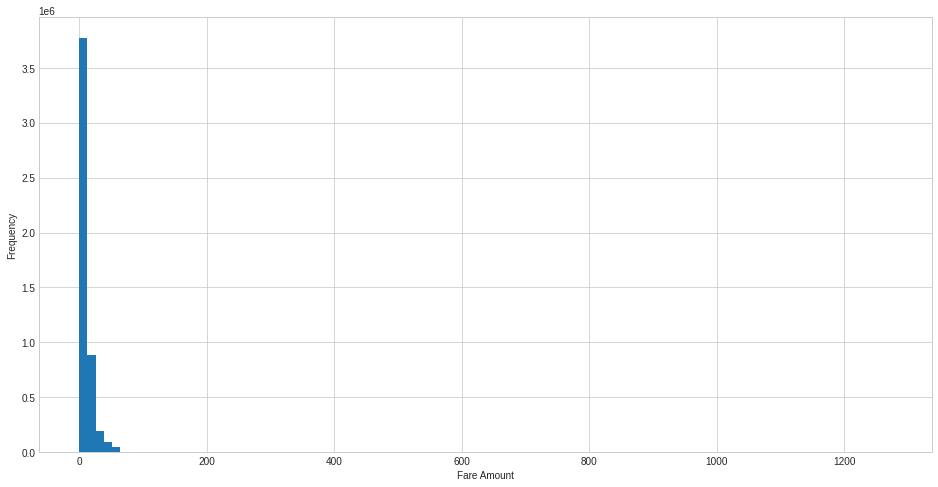

In [10]:
train.fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

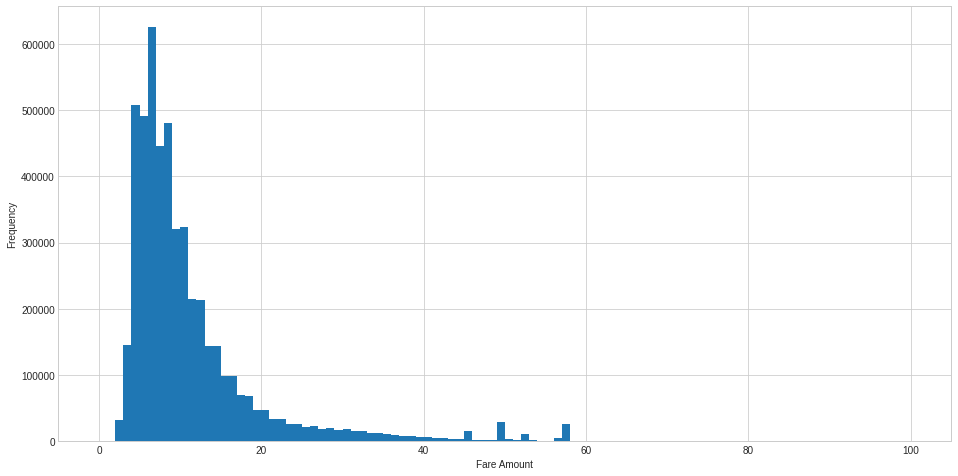

In [11]:
# Lets see the distribution of fare amount less than 100
train[train.fare_amount <100 ].fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

In [12]:
train[train.fare_amount >100 ].shape

(1977, 8)

Text(0, 0.5, 'Frequency')

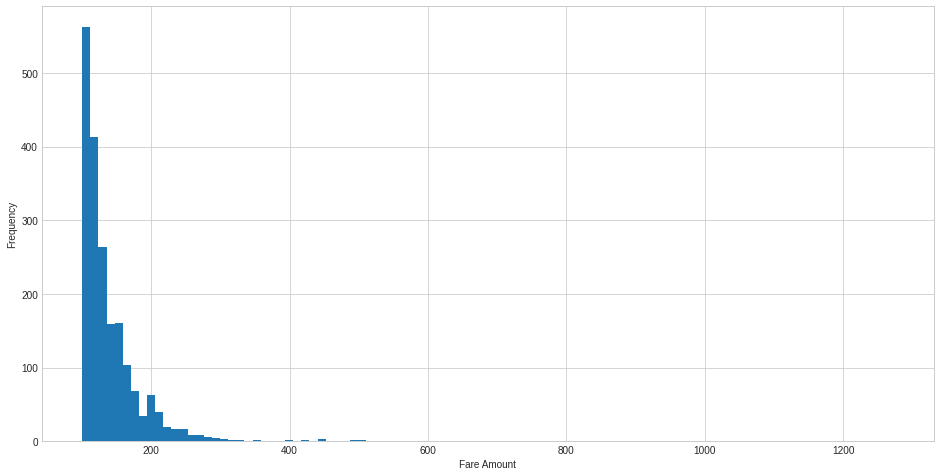

In [13]:
train[train.fare_amount >100 ].fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

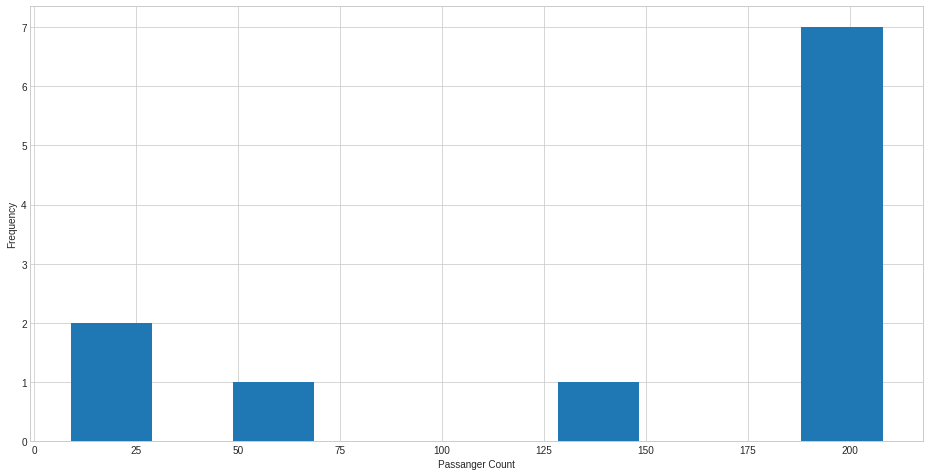

In [14]:
train[train.passenger_count >7].passenger_count.hist(bins=10, figsize = (16,8))
plt.xlabel("Passanger Count")
plt.ylabel("Frequency")

In [15]:
train[train.passenger_count >7]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
929022,2009-07-30 11:54:00.000000193,3.30,2009-07-30 11:54:00 UTC,0.000000,0.000000,0.000000,0.000000,208
1007609,2014-06-24 15:13:00.00000040,104.00,2014-06-24 15:13:00 UTC,-74.015780,40.715420,-74.170280,40.708340,9
2154045,2010-12-16 11:21:00.000000209,3.30,2010-12-16 11:21:00 UTC,0.000000,0.000000,0.000000,0.000000,208
2198549,2010-12-15 14:20:00.00000010,3.30,2010-12-15 14:20:00 UTC,0.000000,0.000000,0.000000,0.000000,208
2910347,2010-12-16 06:44:00.00000039,4.50,2010-12-16 06:44:00 UTC,0.000000,0.000000,0.000000,0.000000,208
3107489,2009-05-12 14:50:00.000000175,2.70,2009-05-12 14:50:00 UTC,-73.937818,40.758260,-73.937827,40.758250,208
3323791,2011-08-27 01:24:00.000000168,8.50,2011-08-27 01:24:00 UTC,-73.987858,40.760340,-74.000682,40.752413,129
4095440,2015-06-14 08:56:16.0000001,37.04,2015-06-14 08:56:16 UTC,-73.982094,40.756252,-73.872482,40.774506,9
4103745,2010-12-22 12:11:00.000000230,23.70,2010-12-22 12:11:00 UTC,0.000000,0.000000,0.000000,0.000000,208
4432483,2009-05-11 13:56:00.00000088,11.10,2009-05-11 13:56:00 UTC,-73.937733,40.758267,-73.937737,40.758273,208


Text(0, 0.5, 'Frequency')

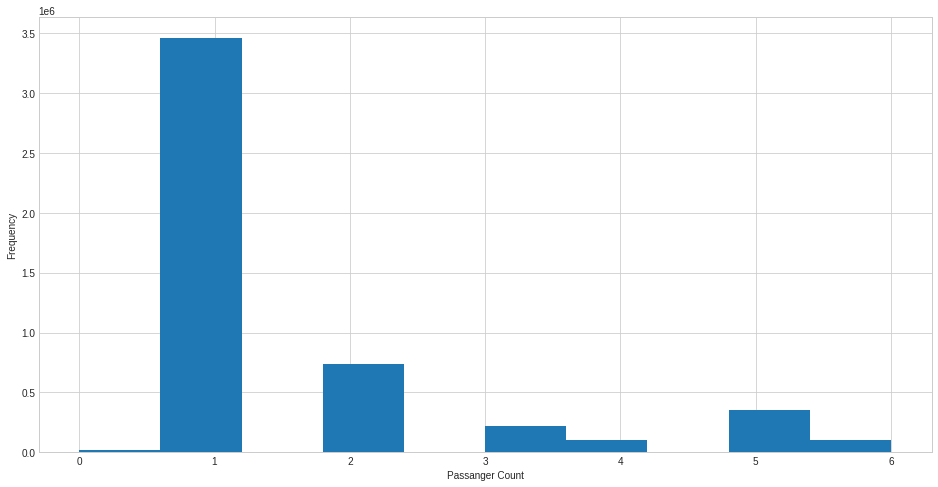

In [16]:
train[train.passenger_count <7].passenger_count.hist(bins=10, figsize = (16,8))
plt.xlabel("Passanger Count")
plt.ylabel("Frequency")

In [17]:
train[train.passenger_count ==0].shape

(17602, 8)

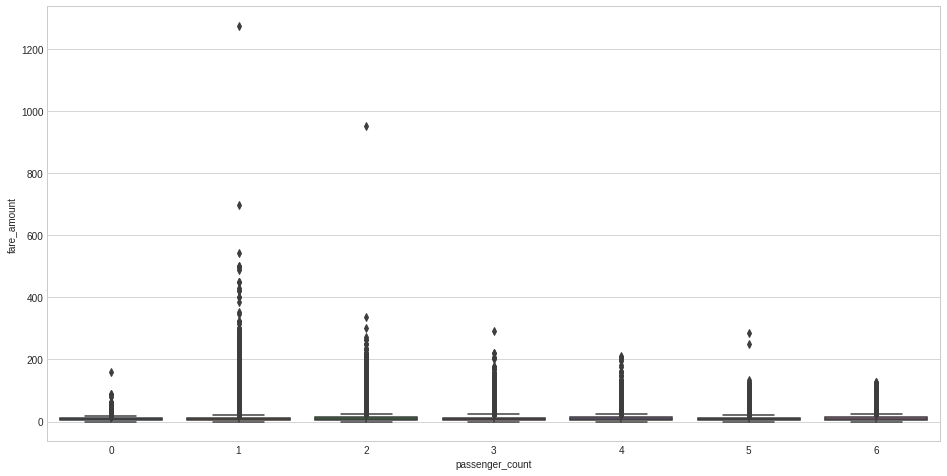

In [18]:
plt.figure(figsize= (16,8))
sns.boxplot(x = train[train.passenger_count< 7].passenger_count, y = train.fare_amount)

In [19]:
train[train.passenger_count <7][['fare_amount','passenger_count']].corr()

,fare_amount,passenger_count
fare_amount,1.00000,0.01322
passenger_count,0.01322,1.00000


In [20]:
print("Shape of test data", test.shape)
test.head()

Shape of test data (9914, 7)


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [21]:
test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [22]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [23]:
min(test.pickup_longitude.min(),test.dropoff_longitude.min()), \
max(test.pickup_longitude.max(),test.dropoff_longitude.max())

(-74.263242, -72.986532)

In [24]:
min(test.pickup_latitude.min(),test.dropoff_latitude.min()), \
max(test.pickup_latitude.max(),test.dropoff_latitude.max())

(40.568973, 41.709555)

In [25]:
def select_within_test_boundary(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])

In [26]:
BB = (-74.5, -72.8, 40.5, 41.8)
print('Old size: %d' % len(train))
train = train[select_within_test_boundary(train, BB)]
print('New size: %d' % len(train))

Old size: 4999753
New size: 4893706


In [27]:
def prepare_time_features(df):
    df['pickup_datetime'] = df['pickup_datetime'].str.slice(0, 16)
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], utc=True, format='%Y-%m-%d %H:%M')
    df['hour_of_day'] = df.pickup_datetime.dt.hour
    df['month'] = df.pickup_datetime.dt.month
    df["year"] = df.pickup_datetime.dt.year
    df["weekday"] = df.pickup_datetime.dt.weekday
    
    return df

In [28]:
train = prepare_time_features(train)
test = prepare_time_features(test)

In [29]:
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))   

In [30]:
train['distance_miles'] = distance(train.pickup_latitude, train.pickup_longitude, \
                                      train.dropoff_latitude, train.dropoff_longitude)

In [31]:
test['distance_miles'] = distance(test.pickup_latitude, test.pickup_longitude, \
                                      test.dropoff_latitude, test.dropoff_longitude)

In [32]:
def transform(data):
    jfk = (-73.7781, 40.6413)
    ewr = (-74.1745, 40.6895)
    lgr = (-73.8740, 40.7769)

    data['pickup_distance_to_jfk'] = distance(jfk[1], jfk[0],
                                         data['pickup_latitude'], data['pickup_longitude'])
    data['dropoff_distance_to_jfk'] = distance(jfk[1], jfk[0],
                                           data['dropoff_latitude'], data['dropoff_longitude'])
    data['pickup_distance_to_ewr'] = distance(ewr[1], ewr[0], 
                                          data['pickup_latitude'], data['pickup_longitude'])
    data['dropoff_distance_to_ewr'] = distance(ewr[1], ewr[0],
                                           data['dropoff_latitude'], data['dropoff_longitude'])
    data['pickup_distance_to_lgr'] = distance(lgr[1], lgr[0],
                                          data['pickup_latitude'], data['pickup_longitude'])
    data['dropoff_distance_to_lgr'] = distance(lgr[1], lgr[0],
                                           data['dropoff_latitude'], data['dropoff_longitude'])
    
    return data

train = transform(train)
test = transform(test)

In [33]:
train[(train['distance_miles']==0)&(train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,month,year,weekday,distance_miles,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_ewr,dropoff_distance_to_ewr,pickup_distance_to_lgr,dropoff_distance_to_lgr
331597,2013-08-05 06:45:54.0000005,0.0,2013-08-05 06:45:00+00:00,-73.982354,40.679971,-73.982354,40.679971,1,6,8,2013,0,0.0,11.033947,11.033947,10.088806,10.088806,8.777184,8.777184
436658,2015-03-04 22:33:39.0000008,0.0,2015-03-04 22:33:00+00:00,-74.043442,40.788208,-74.043442,40.788208,1,22,3,2015,2,0.0,17.208424,17.208424,9.674078,9.674078,8.899057,8.899057
689250,2015-05-27 23:10:03.0000004,0.0,2015-05-27 23:10:00+00:00,-73.994125,40.741131,-73.994125,40.741131,1,23,5,2015,2,0.0,13.253658,13.253658,10.097370,10.097370,6.755154,6.755154
1662545,2010-03-13 02:39:29.0000001,0.0,2010-03-13 02:39:00+00:00,-74.035278,40.738683,-74.035278,40.738683,2,2,3,2010,5,0.0,15.060166,15.060166,8.044207,8.044207,8.844117,8.844117
2214498,2010-02-03 11:44:07.0000002,0.0,2010-02-03 11:44:00+00:00,-74.014147,40.710546,-74.014147,40.710546,1,11,2,2010,2,0.0,13.262164,13.262164,8.524551,8.524551,8.651064,8.651064
2329503,2015-02-19 09:43:11.0000007,0.0,2015-02-19 09:43:00+00:00,-73.953857,40.813251,-73.953857,40.813251,1,9,2,2015,3,0.0,15.028026,15.028026,14.369537,14.369537,4.874081,4.874081
2581417,2015-05-07 19:12:43.0000005,0.0,2015-05-07 19:12:00+00:00,-73.913727,40.779018,-73.913727,40.779018,1,19,5,2015,3,0.0,11.874358,11.874358,14.988477,14.988477,2.083680,2.083680
3070651,2015-01-25 20:54:02.0000004,0.0,2015-01-25 20:54:00+00:00,-73.981293,40.769012,-73.981293,40.769012,1,20,1,2015,6,0.0,13.825115,13.825115,11.511639,11.511639,5.640439,5.640439
3252539,2015-01-14 10:15:51.0000002,0.0,2015-01-14 10:15:00+00:00,-73.937508,40.758129,-73.937508,40.758129,1,10,1,2015,2,0.0,11.613939,11.613939,13.284777,13.284777,3.567391,3.567391
3712453,2010-03-29 12:47:22.0000005,0.0,2010-03-29 12:47:00+00:00,-73.836776,40.869879,-73.836776,40.869879,1,12,3,2010,0,0.0,16.089089,16.089089,21.622569,21.622569,6.712571,6.712571


In [34]:
print("old size: %d" % len(train))
train = train.drop(index= train[(train['distance_miles']==0)&(train['fare_amount']==0)].index, axis=0)
print("New size: %d" % len(train))

old size: 4893706
New size: 4893691


In [35]:
print("old size: %d" % len(train))
train = train.drop(index= train[train['fare_amount']==0].index, axis=0)
print("New size: %d" % len(train))

old size: 4893691
New size: 4893599


In [36]:
print("old size: %d" % len(train))
train = train.drop(index= train[train['fare_amount'] < 2.5].index, axis=0)
print("New size: %d" % len(train))

old size: 4893599
New size: 4893546


In [37]:
train[train.passenger_count >= 7]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,month,year,weekday,distance_miles,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_ewr,dropoff_distance_to_ewr,pickup_distance_to_lgr,dropoff_distance_to_lgr
1007609,2014-06-24 15:13:00.00000040,104.00,2014-06-24 15:13:00+00:00,-74.015780,40.715420,-74.170280,40.708340,9,15,6,2014,1,8.106351,13.466019,21.066468,8.504471,1.320355,8.551259,16.217073
3107489,2009-05-12 14:50:00.000000175,2.70,2009-05-12 14:50:00+00:00,-73.937818,40.758260,-73.937827,40.758250,208,14,5,2009,1,0.000836,11.631908,11.631767,13.272820,13.272133,3.579259,3.579947
3323791,2011-08-27 01:24:00.000000168,8.50,2011-08-27 01:24:00+00:00,-73.987858,40.760340,-74.000682,40.752413,129,1,8,2011,5,0.866290,13.724851,13.960325,10.930179,10.086771,6.066835,6.841901
4095440,2015-06-14 08:56:16.0000001,37.04,2015-06-14 08:56:00+00:00,-73.982094,40.756252,-73.872482,40.774506,9,8,6,2015,6,5.873045,13.314223,10.447165,11.080643,16.868219,5.833638,0.183507
4432483,2009-05-11 13:56:00.00000088,11.10,2009-05-11 13:56:00+00:00,-73.937733,40.758267,-73.937737,40.758273,208,13,5,2009,0,0.000463,11.629041,11.629480,13.277148,13.277101,3.574935,3.574980
4467314,2015-01-01 21:32:16.0000007,8.50,2015-01-01 21:32:00+00:00,-74.005867,40.740643,-73.988045,40.735100,7,21,1,2015,3,1.008573,13.765823,12.766618,9.512039,10.260783,7.341972,6.630882


In [38]:
print("old size: %d" % len(train))
train = train.drop(index= train[train.passenger_count >= 7].index, axis=0)
print("New size: %d" % len(train))

old size: 4893546
New size: 4893540


In [39]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,4893540.0,11.320877,9.689499,2.500000,6.000000,8.500000,12.500000,952.000000
pickup_longitude,4893540.0,-73.975143,0.038514,-74.496498,-73.992271,-73.982100,-73.968332,-72.812577
pickup_latitude,4893540.0,40.751088,0.029570,40.500046,40.736560,40.753359,40.767545,41.696852
dropoff_longitude,4893540.0,-73.974293,0.037656,-74.499912,-73.991580,-73.980610,-73.965358,-72.817832
dropoff_latitude,4893540.0,40.751459,0.032764,40.500046,40.735607,40.753865,40.768407,41.714633
passenger_count,4893540.0,1.684464,1.307637,0.000000,1.000000,1.000000,2.000000,6.000000
hour_of_day,4893540.0,13.511187,6.514973,0.000000,9.000000,14.000000,19.000000,23.000000
month,4893540.0,6.268756,3.436530,1.000000,3.000000,6.000000,9.000000,12.000000
year,4893540.0,2011.736220,1.863021,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000
weekday,4893540.0,3.041579,1.949395,0.000000,1.000000,3.000000,5.000000,6.000000


In [40]:
pd.cut(train['distance_miles'],np.linspace(0, 70, num = 8)).value_counts()

(0.0, 10.0]     4738255
(10.0, 20.0]     101887
(20.0, 30.0]        657
(60.0, 70.0]        469
(50.0, 60.0]        256
(30.0, 40.0]        109
(40.0, 50.0]         32
Name: distance_miles, dtype: int64

In [41]:
pd.cut(test['distance_miles'],np.linspace(0, 70, num = 8)).value_counts()

(0.0, 10.0]     9611
(10.0, 20.0]     214
(60.0, 70.0]       3
(20.0, 30.0]       1
(50.0, 60.0]       0
(40.0, 50.0]       0
(30.0, 40.0]       0
Name: distance_miles, dtype: int64

In [42]:
fare_100 = train[train.fare_amount > 100]
fare_100.shape

(1669, 19)

In [43]:
fare_100[fare_100.distance_miles <1].shape

(527, 19)

In [44]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'hour_of_day', 'month', 'year', 'weekday',
       'distance_miles', 'pickup_distance_to_jfk', 'dropoff_distance_to_jfk',
       'pickup_distance_to_ewr', 'dropoff_distance_to_ewr',
       'pickup_distance_to_lgr', 'dropoff_distance_to_lgr'],
      dtype='object')

In [45]:
df_train = train.drop(columns= ['key','pickup_datetime'], axis= 1).copy()
df_test = test.drop(columns= ['key','pickup_datetime'], axis= 1).copy()
print(df_train.shape)
print(df_test.shape)

(4893540, 17)
(9914, 16)


#Train Test Split

In [46]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('fare_amount', axis=1),
                                                    df_train['fare_amount'], test_size=0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3914832, 16)
(978708, 16)
(3914832,)
(978708,)


#XG Boost Model

In [47]:
import xgboost as xgb

In [48]:
params = {
   
    'max_depth': 7,
    'gamma' :0,
    'eta':.03, 
    'subsample': 1,
    'colsample_bytree': 0.9, 
    'objective':'reg:linear',
    'eval_metric':'rmse',
    'silent': 0,
    'n_estimators': 100,
}

In [49]:
def XGBmodel(X_train,X_test,y_train,y_test,params):
    matrix_train = xgb.DMatrix(X_train,label=y_train)
    matrix_test = xgb.DMatrix(X_test,label=y_test)
    model=xgb.train(params=params,
                    dtrain=matrix_train, 
                    evals=[(matrix_test,'test')])
    return model

model = XGBmodel(X_train,X_test,y_train,y_test,params)

[01:26:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	test-rmse:14.125
[1]	test-rmse:13.7389
[2]	test-rmse:13.3895
[3]	test-rmse:13.0275
[4]	test-rmse:12.6785
[5]	test-rmse:12.3408
[6]	test-rmse:12.0147
[7]	test-rmse:11.6985
[8]	test-rmse:11.3925
[9]	test-rmse:11.0971


In [50]:
prediction = model.predict(xgb.DMatrix(df_test), ntree_limit = model.best_ntree_limit).tolist()

In [51]:
holdout = pd.DataFrame({'key': test['key'], 'fare_amount': prediction})
holdout.to_csv('xgb_4m_utc_with_cleaning.csv', index=False)

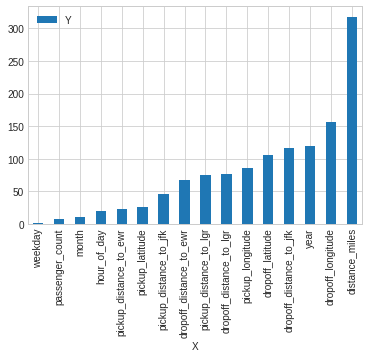

In [52]:
import matplotlib.pyplot as plt
fscores = pd.DataFrame({'X': list(model.get_fscore().keys()), 'Y': list(model.get_fscore().values())})
fscores.sort_values(by='Y').plot.bar(x='X')